<a href="https://colab.research.google.com/github/rookasrudzianskas/PytorchModels/blob/master/FINAL_open_source_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import torch
from torch import nn # nn contains all of the Twitter Building blocks
import matplotlib.pyplot as plt

torch.__version__

'1.12.1+cu113'

In [26]:
weight = 0.7 # b
bias = 0.3 # a

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [27]:
len(X), len(y)

(50, 50)

In [28]:
train_split = int(0.8 * len(X))
train_split
# 40 samples of x and other 40 samples of y

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [29]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
  plt.figure(figsize=(10, 7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  # PLot
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  plt.legend(prop={"size": 14})

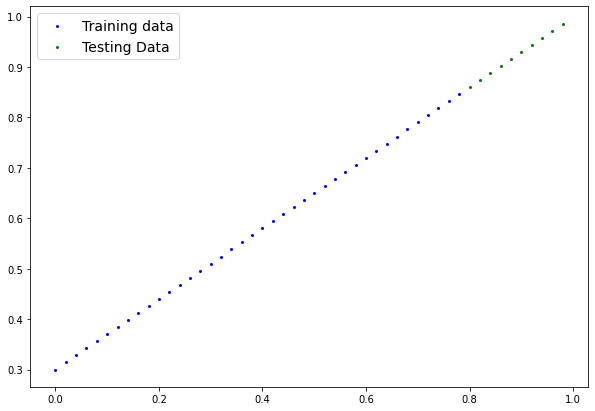

In [30]:
plot_predictions()

In [31]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    # variables what our model needs to be using
    self.weights = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.rand(1, requires_grad=True, dtype=torch.float))
    # forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias # this is linear regression formula

In [32]:
# torch.manual_seed(42)
# torch.randn(1)

In [33]:
torch.manual_seed(42)

# Instance of the model I created
model_0 = LinearRegressionModel()

# Check out the params
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True), Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [34]:
# List named params
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [35]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]), tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [36]:
# y_preds = model_0(X_test)
# y_preds

In [37]:
# Making predictions torch.inference_mode()
with torch.inference_mode():
  y_preds = model_0(X_test)

# with torch.no_grad():
#   y_preds = model_0(X_test)

y_preds


tensor([[1.6208],
        [1.6385],
        [1.6561],
        [1.6738],
        [1.6914],
        [1.7090],
        [1.7267],
        [1.7443],
        [1.7620],
        [1.7796]])

In [38]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

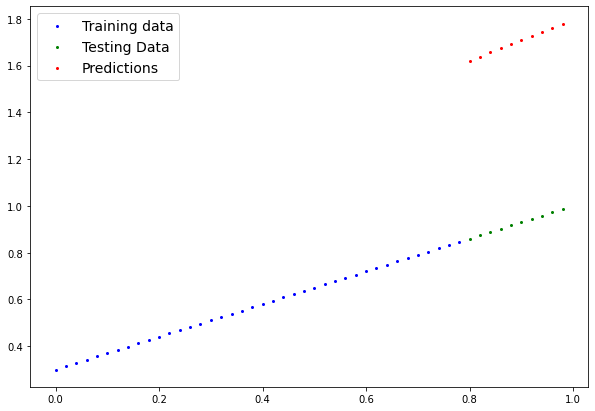

In [39]:
plot_predictions(predictions=y_preds)

In [40]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True), Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [41]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([0.9150]))])

In [42]:
loss_fn = nn.L1Loss() # measures how poor our function is

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01) # adjust the params to reduce the lost

In [43]:
torch.manual_seed(42)

# One loop through the data, 1 go trought the data
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

# TRAINING
# Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in Pytorch set all params that require gradients to require gradients

  # Forward pass
  #  This evaluates the patters what Twitter model have learned -> forward(), does some calculatations
  y_pred = model_0(X_train)

  # Calculate the loss, this is calculating how wrong the model calculations are from idea model
  # Calculating the diference between model predictions on the training model set, and the ideal training values
  # PREDICTIONS -> LABELS
  loss = loss_fn(y_pred, y_train)

  # Optimizer zero grad, to start fresh in every loop, 
  optimizer.zero_grad()

  # Perform backpropagation on the loss with respect to the params of the model
  # I computes gradients of every parameter
  loss.backward()

  # Step the optimizer (perform gradient descent)
  optimizer.step() # by default, how the optimizer changes will accumulate throught the loop. I zero them up, because in step 3 it tries to go one more time

  model_0.eval() # turns off gradient tracking, and other settings in the model not needed for testing
  with torch.inference_mode(): # turns off gradient tracking
    # Do the forward pass
    test_pred = model_0(X_test)
    # Calculate the loss
    test_loss = loss_fn(test_pred, y_test)
  # Print what is happening
  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Test: {loss} | Test loss: {test_loss}")
    print(model_0.state_dict())


Epoch: 0 | Test: 0.6860889196395874 | Test loss: 0.7637526988983154
OrderedDict([('weights', tensor([0.8784])), ('bias', tensor([0.9050]))])
Epoch: 10 | Test: 0.5708791017532349 | Test loss: 0.6290428042411804
OrderedDict([('weights', tensor([0.8394])), ('bias', tensor([0.8050]))])
Epoch: 20 | Test: 0.45566922426223755 | Test loss: 0.4943329691886902
OrderedDict([('weights', tensor([0.8004])), ('bias', tensor([0.7050]))])
Epoch: 30 | Test: 0.34045934677124023 | Test loss: 0.35962313413619995
OrderedDict([('weights', tensor([0.7614])), ('bias', tensor([0.6050]))])
Epoch: 40 | Test: 0.2252494841814041 | Test loss: 0.2249133139848709
OrderedDict([('weights', tensor([0.7224])), ('bias', tensor([0.5050]))])
Epoch: 50 | Test: 0.1100396141409874 | Test loss: 0.09020347893238068
OrderedDict([('weights', tensor([0.6834])), ('bias', tensor([0.4050]))])
Epoch: 60 | Test: 0.009724985808134079 | Test loss: 0.020998019725084305
OrderedDict([('weights', tensor([0.6539])), ('bias', tensor([0.3200]))])

In [44]:
# epoch_count, loss_values, test_loss_values

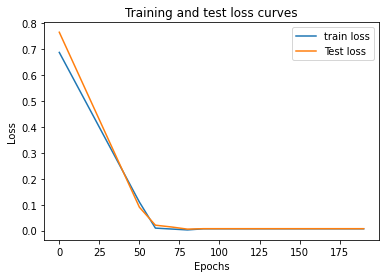

In [52]:
import numpy as np

plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [46]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

In [47]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [48]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [49]:
weight, bias

(0.7, 0.3)

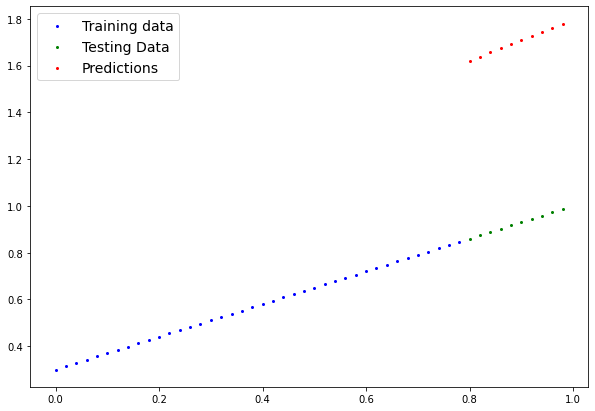

In [50]:
plot_predictions(predictions=y_preds)

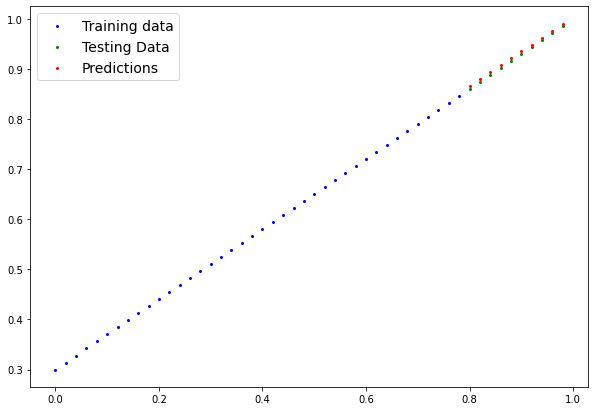

In [51]:
plot_predictions(predictions=y_preds_new)

In [53]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [62]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_python_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to : {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to : models/01_python_workflow_model_0.pth


In [63]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1063 Nov 24 11:35 01_python_workflow_model_0.pth


In [68]:
# A new class of our model
loaded_model_0 = LinearRegressionModel()

# Load the saved state dict 
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [69]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6977])), ('bias', tensor([0.3080]))])

In [70]:
# Make some predictions, to make sure I loaded the model correctly
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8661],
        [0.8801],
        [0.8940],
        [0.9080],
        [0.9220],
        [0.9359],
        [0.9499],
        [0.9638],
        [0.9778],
        [0.9917]])

In [75]:
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

In [76]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])